In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#處理 plt 圖形顯示中文字時遇到的問題
#matplotlib.matplotlib_fname()
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 使用 NCCU MOOCS 課程提供的 grades.csv 範例檔
不過修改了科目名稱，改成喜歡的科目，比較有趣！

In [3]:
#可先用 %ls 指令了解目前所處路徑裡，存有哪些檔案。例如確認有 grades.csv，即可使用檔名直接讀取
df_grades = pd.read_csv('grades.csv')
df_grades.head(6)  #希望跑出 6 列，而 python 指標從 0 開始，所以會秀到索引值為 5 那一列

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8


### 1. 檢視及調整資料

In [4]:
df_grades.info()  #看整個資料的行列數資訊，此函數還會附上其他 info；也可以用 shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   姓名      100 non-null    object
 1   國文      100 non-null    int64 
 2   英文      100 non-null    int64 
 3   數學      100 non-null    int64 
 4   自然      100 non-null    int64 
 5   社會      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [5]:
#修改考科名稱，改成自己喜歡的科目；也同時新增資料編碼，如學生 ID，可方便以 ID 找資料 ❤  
#Change the subjects to those I like, set the new indexes starting from 1
df_grades.columns = ['姓名 Name','消費者行為_Consumer_Behavior',
                      '管理學 Management Science','行銷學 Marketing',
                      '組織行為 Oraganizational Behavior',
                      '人力資源管理 Human Resource Management']
t1 = list(range(100, 200))
df_grades = df_grades.assign(ID = t1)
df_grades = df_grades[['ID','姓名 Name','消費者行為_Consumer_Behavior',
                      '管理學 Management Science','行銷學 Marketing',
                      '組織行為 Oraganizational Behavior',
                      '人力資源管理 Human Resource Management']]
df_grades.head()

,ID,姓名 Name,消費者行為_Consumer_Behavior,管理學 Management Science,行銷學 Marketing,組織行為 Oraganizational Behavior,人力資源管理 Human Resource Management
0,100,劉俊安,9,10,15,10,13
1,101,胡玉華,10,10,10,8,9
2,102,黃淑婷,13,15,8,11,14
3,103,陳上紫,10,10,8,9,14
4,104,崔靜成,13,12,14,12,13


In [6]:
df_grades.info()  #重新檢視欄位，發現 ID 欄圍可計算之整數型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID                                100 non-null    int64 
 1   姓名 Name                           100 non-null    object
 2   消費者行為_Consumer_Behavior           100 non-null    int64 
 3   管理學 Management Science            100 non-null    int64 
 4   行銷學 Marketing                     100 non-null    int64 
 5   組織行為 Oraganizational Behavior     100 non-null    int64 
 6   人力資源管理 Human Resource Management  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [7]:
#將 ID 欄位資料的型態改為字串
df_grades = df_grades.astype({'ID':str})
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID                                100 non-null    object
 1   姓名 Name                           100 non-null    object
 2   消費者行為_Consumer_Behavior           100 non-null    int64 
 3   管理學 Management Science            100 non-null    int64 
 4   行銷學 Marketing                     100 non-null    int64 
 5   組織行為 Oraganizational Behavior     100 non-null    int64 
 6   人力資源管理 Human Resource Management  100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


Note: 也可寫成 df_grades['ID'] = df_grades['ID'].astype(str)；但若等號左方沒有指定欄位名稱，如 df_grades = df_grades['ID'].astype(str)，則可能因表示對 df_grades 重新賦值而會出現錯誤

### 2. 了解各學生成績表現

In [8]:
#如何知道每個學生單一考科的表現？（找單一變數資料的方法）　
#How to find out the profermance of certain subject? (the way to find values under certain variable.)
df_grades.消費者行為_Consumer_Behavior

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 消費者行為_Consumer_Behavior, Length: 100, dtype: int64

Note <br>
1. 可使用 dot notation "." 或方框 [] (indexing operator) 來帶入要找的欄位，但會有以下差異：<br>**dot 速度較快**，但受限於是單純以 . 隔開，不如以方框隔開方式、且方框中還可加 ' ' 來將數字或空格類型資料與其他運算方法隔開，所以在遇到數字開頭或內含空格的欄位名時，會出現辨識議題，故會遇到這種情境時，要改成使用方框 []
2. 若要使用方框：<br>
因資料型態為 Series，故只需用一層 []，寫法可改為 **df_grades['消費者行為_Consumer_Behavior']**；故若判斷資料型態屬於 dataframe，則須再加上一層方框，使 Python 能辨識要抓取的是 df 資料
3. 後不需加括號 ()：<br>
此行程式是為了單純秀出原資料表的某部分資料，不是在呼叫函式來將資料放入函數進行數學運算，所以後面不需使用括號 ()；且 Series 函數也不能不搭配其他方法或函數就純呼叫，**'Series' object is not callable**
4. 前面不賦值：<br>
例如使 a = df_grades.消費者行為_Consumer_Behavior，這樣才能秀出資料表結果；否則此行指令任務將會變成把結果賦給前面的變數（若有），而非呈現結果，同時 Output 也就不會顯示東西了

Ref 
1. "Difference between using bracket (`[]`) and dot (`.`) notation"  https://stackoverflow.com/questions/17189642/difference-between-using-bracket-and-dot-notation
2. 另一篇講得滿好的文章："Should you use "dot notation" or "bracket notation" with pandas?"  https://www.dataschool.io/pandas-dot-notation-vs-brackets/

In [9]:
#若想了解多科的成績呢？　此時則要使用方框，且因調閱出來的資料屬性屬於 dataframe，故需使用二層方框  
#How to know the performance for multiple subjects?  Need to adopt double square brackets.
df_grades[["姓名 Name","消費者行為_Consumer_Behavior", '管理學 Management Science']]  #Python 可選擇使用單引號或雙引號，但混用不行喔！

,姓名 Name,消費者行為_Consumer_Behavior,管理學 Management Science
0,劉俊安,9,10
1,胡玉華,10,10
2,黃淑婷,13,15
3,陳上紫,10,10
4,崔靜成,13,12
...,...,...,...
95,蔡佳燕,9,10
96,吳筱婷,8,10
97,陳家銘,14,9
98,李明威,15,9


### 3. 了解整體表現

In [10]:
#全體學生的學科表現如何呢？平均值？大多數人成績？高低分？
df_grades.mean()

ID                                  1.001011e+297
消費者行為_Consumer_Behavior              1.139000e+01
管理學 Management Science               1.138000e+01
行銷學 Marketing                        1.157000e+01
組織行為 Oraganizational Behavior        1.103000e+01
人力資源管理 Human Resource Management     1.183000e+01
dtype: float64

Note <br>
1. mean 後須加括號：因 mean 屬於此物件的方法，而非屬性，所以須經過運算，故寫括號後，跑出之結果才會是最後期望的單一值；不加括號時，則是秀出運算此函數的過程中調閱之資料
2. 括號中未寫明運算軸心時，則預設為 axis = 0：表示加總每列，會得到每科平均值；若 axis = 1，則為加總每欄，將得到每位學生的科目平均。注意，若資料型態為 Series 時，無法指定軸心 axis = 1，會出現錯誤。

In [11]:
df_grades.median().round(0)

ID                                  150.0
消費者行為_Consumer_Behavior              11.0
管理學 Management Science               11.0
行銷學 Marketing                        11.0
組織行為 Oraganizational Behavior        11.0
人力資源管理 Human Resource Management     12.0
dtype: float64

In [12]:
#快速解，用 describe 調閱整合性敘述統計資料
df_grades.describe().round(2)

,消費者行為_Consumer_Behavior,管理學 Management Science,行銷學 Marketing,組織行為 Oraganizational Behavior,人力資源管理 Human Resource Management
count,100.00,100.00,100.00,100.00,100.00
mean,11.39,11.38,11.57,11.03,11.83
std,2.20,2.27,2.31,2.22,2.49
min,8.00,8.00,8.00,8.00,8.00
25%,9.00,9.00,10.00,9.00,9.00
50%,11.00,11.00,11.00,11.00,12.00
75%,13.00,13.00,14.00,13.00,14.00
max,15.00,15.00,15.00,15.00,15.00


### 4. 作圖協助分析

In [13]:
#取平均數和中位數來畫圖
df_grades.describe().iloc[[1,5],:]

,消費者行為_Consumer_Behavior,管理學 Management Science,行銷學 Marketing,組織行為 Oraganizational Behavior,人力資源管理 Human Resource Management
mean,11.39,11.38,11.57,11.03,11.83
50%,11.00,11.00,11.00,11.00,12.00


In [14]:
df_plot = df_grades.describe().iloc[[1,5],:].T
df_plot

,mean,50%
消費者行為_Consumer_Behavior,11.39,11.0
管理學 Management Science,11.38,11.0
行銷學 Marketing,11.57,11.0
組織行為 Oraganizational Behavior,11.03,11.0
人力資源管理 Human Resource Management,11.83,12.0


根據 dataframe 資料畫圖時，用 .plot，並可能要先轉置 dataframe；根據 x, y list 畫圖時，使用 matplot 套件的 .plt.scatter/plot/figure 等

<AxesSubplot:>

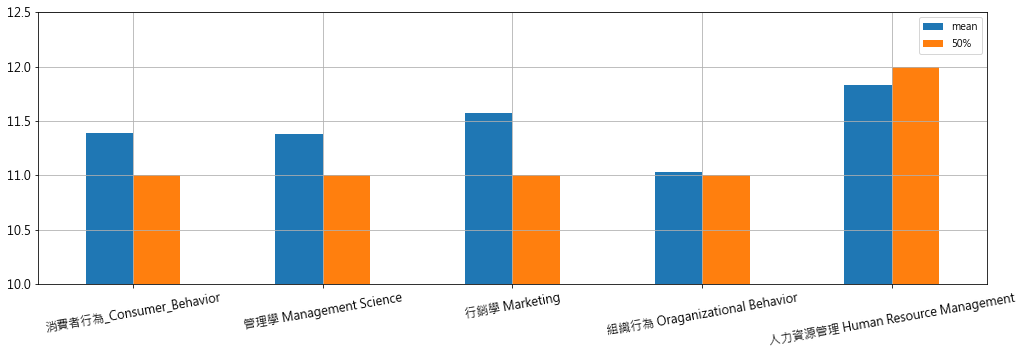

In [15]:
df_plot.plot(kind = 'bar', ylim = (10,12.5), figsize = (17,5), rot = 10, fontsize = 12, grid = True) 

Note<br>
1. 將 y 軸座標限縮在 10 與 12.5 間，方便看出差異
2. 可以看到學員們在人力資源管理課程有平均而言較好的表現，較差的則是組織行為。
3. 而 describe() 表缺少眾數資訊，需另外計算，以來解各成績峰態分配

array([[<AxesSubplot:title={'center':'消費者行為_Consumer_Behavior'}>,
        <AxesSubplot:title={'center':'管理學 Management Science'}>],
       [<AxesSubplot:title={'center':'行銷學 Marketing'}>,
        <AxesSubplot:title={'center':'組織行為 Oraganizational Behavior'}>],
       [<AxesSubplot:title={'center':'人力資源管理 Human Resource Management'}>,
        <AxesSubplot:>]], dtype=object)

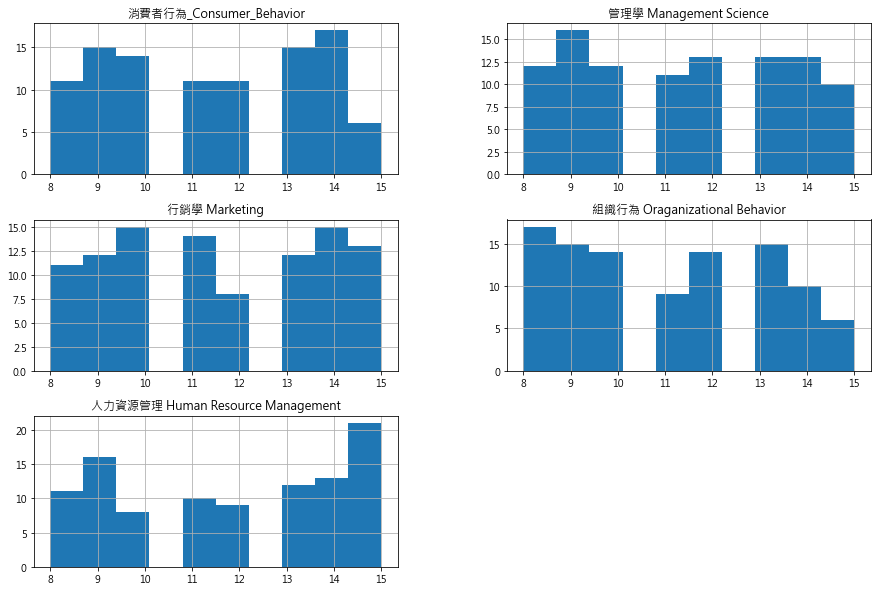

In [16]:
df_grades.hist(figsize = (15,10))

由這些可以看出各學科的眾數分別是：14, 9, (10, 14), 8, 15，可再結合前述資訊做分析